# Rice Data - Using CNN Model

In [ ]:
import os

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.DataFrame(columns=["image_name","label"])

In [ ]:
import gdown

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1J5pyr0VSoJUUrsTWcoMRG7X6AtMPLa0-/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1J5pyr0VSoJUUrsTWcoMRG7X6AtMPLa0-
To: /content/CNN_Rice_Data1.tar.xz
100% 156M/156M [00:00<00:00, 260MB/s]


In [ ]:
!tar xvf /content/CNN_Rice_Data1.tar.xz

In [ ]:
IMAGE_DIR = "/content/CNN_Rice_Data/images/"

In [ ]:
for index, image in enumerate(os.listdir(IMAGE_DIR)):
    if image.startswith("A"):
        df.loc[index,"image_name"] = image
        df.loc[index,"label"] = "Arborio"
    elif image.startswith("b"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"Basmati"]
    elif image.startswith("B"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"Basmati"]
    elif image.startswith("I"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"Ipsala"]
    elif image.startswith("J"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"Jasmine"]
    elif image.startswith("K"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"Karacadag"]

In [ ]:
df.head()

,image_name,label
0,basmati (9413).jpg,Basmati
1,Jasmine (648).jpg,Jasmine
2,Ipsala (3205).jpg,Ipsala
3,Arborio (9794).jpg,Arborio
4,Karacadag (2435).jpg,Karacadag


In [ ]:
df.shape

(75000, 2)

In [ ]:
df.label.value_counts()

Basmati      15000
Jasmine      15000
Ipsala       15000
Arborio      15000
Karacadag    15000
Name: label, dtype: int64

In [ ]:
train_DataGenerator = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2
)

test_DataGenerator = ImageDataGenerator(
    rescale=1/255,
)

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
train_df.shape

(60000, 2)

In [ ]:
test_df.shape

(15000, 2)

In [ ]:
train_images = train_DataGenerator.flow_from_dataframe(
    dataframe=train_df,
    x_col="image_name",
    y_col="label",
    directory = IMAGE_DIR,
    target_size=(128, 128),
    class_mode="categorical",
    seed=42,
    subset='training'
)

val_images = train_DataGenerator.flow_from_dataframe(
    dataframe=train_df,
    x_col="image_name",
    y_col="label",
    directory = IMAGE_DIR,
    target_size=(128, 128),
    class_mode="categorical",
    seed=42,
    subset='validation'
)

test_images = test_DataGenerator.flow_from_dataframe(
    dataframe=test_df,
    x_col="image_name",
    y_col="label",
    directory = IMAGE_DIR,
    target_size=(128, 128),
    class_mode="categorical"
)

Found 48000 validated image filenames belonging to 5 classes.
Found 12000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.


In [ ]:
test_images.image_shape

(128, 128, 3)

In [ ]:
test_images.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [ ]:
train_images.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [ ]:
model = Sequential([
    Conv2D(filters = 16, kernel_size = (3,3), activation = "relu", input_shape = (128, 128, 3), name= "Input_Layer"),
    MaxPool2D((2,2), name = "Pooling_1"),
    Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", name= "Conv_1"),
    Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", name= "Conv_2"),
    MaxPool2D((2,2), name = "Pooling_2"),
    Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", name= "Conv_3"),
    Conv2D(filters = 128, kernel_size = (3,3), activation = "relu", name= "Conv_4"),
    MaxPool2D((2,2), name = "Pooling_3"),
    Flatten(),
    Dense(128, activation="tanh", name="Dense_1"),
    Dense(64, activation="relu", name="Dense_2"),
    Dense(16, activation="relu", name="Dense_3"),
    Dense(5, activation='sigmoid', name= 'Output')])
    

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Conv2D)        (None, 126, 126, 16)      448       
                                                                 
 Pooling_1 (MaxPooling2D)    (None, 63, 63, 16)        0         
                                                                 
 Conv_1 (Conv2D)             (None, 61, 61, 32)        4640      
                                                                 
 Conv_2 (Conv2D)             (None, 59, 59, 64)        18496     
                                                                 
 Pooling_2 (MaxPooling2D)    (None, 29, 29, 64)        0         
                                                                 
 Conv_3 (Conv2D)             (None, 27, 27, 64)        36928     
                                                                 
 Conv_4 (Conv2D)             (None, 25, 25, 128)      

In [ ]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics="accuracy"
)

# more optimizers -rmsprop, adam, 
# more loss - categorical_crossentropy, binary_crossentropy, sparse_categorical_crossentropy

In [ ]:
train_images.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [ ]:
es_callback = EarlyStopping(
    monitor = 'val_loss',
    patience=5,
    restore_best_weights = True
    
)

In [ ]:
tb_callback = TensorBoard(log_dir = "../tensorboard_logs", histogram_freq = 1)

In [ ]:
history = model.fit(
    train_images,
    epochs = 20,   # max 15 epoch
    validation_data=val_images,
    callbacks=[es_callback,tb_callback]
)

Epoch 1/20
1500/1500 [==============================] - 86s 57ms/step - loss: 0.1348 - accuracy: 0.9533 - val_loss: 0.1068 - val_accuracy: 0.9658
Epoch 2/20
1500/1500 [==============================] - 80s 53ms/step - loss: 0.0541 - accuracy: 0.9824 - val_loss: 0.0351 - val_accuracy: 0.9881
Epoch 3/20
1500/1500 [==============================] - 84s 56ms/step - loss: 0.0311 - accuracy: 0.9903 - val_loss: 0.0244 - val_accuracy: 0.9916
Epoch 4/20
1500/1500 [==============================] - 80s 53ms/step - loss: 0.0252 - accuracy: 0.9918 - val_loss: 0.0325 - val_accuracy: 0.9895
Epoch 5/20
1500/1500 [==============================] - 78s 52ms/step - loss: 0.0223 - accuracy: 0.9927 - val_loss: 0.0187 - val_accuracy: 0.9950
Epoch 6/20
1500/1500 [==============================] - 84s 56ms/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0201 - val_accuracy: 0.9935
Epoch 7/20
1500/1500 [==============================] - 83s 55ms/step - loss: 0.0188 - accuracy: 0.9936 - val_loss: 0.0193 -

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

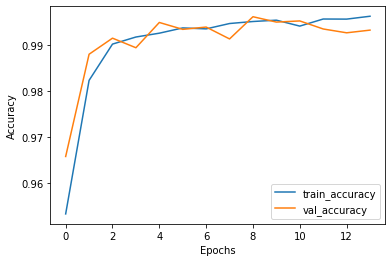

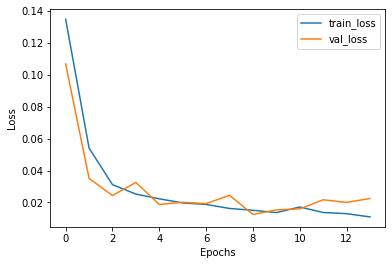

In [ ]:
plt.plot(history.history['accuracy'], label="train_accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model.save("../models/cnn_rice_image_model.h5", save_format='h5')

In [ ]:
model.evaluate(test_images)

469/469 [==============================] - 18s 39ms/step - loss: 0.0133 - accuracy: 0.9959


[0.01325768418610096, 0.9959333539009094]

In [ ]:
test_images.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [ ]:
y_predicted = model.predict(test_images)

In [ ]:
y_predicted[1]

array([3.3758606e-05, 2.4851146e-03, 1.4223956e-03, 9.9605858e-01,
       1.8194649e-07], dtype=float32)

In [ ]:
y_predicted.shape

(15000, 5)

In [ ]:
np.argmax(y_predicted[1])

3

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[0, 3, 3, 3, 1]

In [ ]:
test_images.labels[:5]

[0, 4, 1, 2, 2]

In [ ]:
#predictions = np.reshape(model.predict(test_images),-1).astype(int)

In [ ]:
#(test_images)

In [ ]:
#predictions.shape

In [ ]:
#pred_label = [np.argmax(i) for i in pred]

In [ ]:
#pred_label

In [ ]:
#test_images.labels

In [ ]:
#test_images.labels[:10]

In [ ]:
cm = tf.math.confusion_matrix(labels=test_images.labels, predictions=y_predicted_labels)

In [ ]:
#cm = confusion_matrix(pred,test_images.labels)

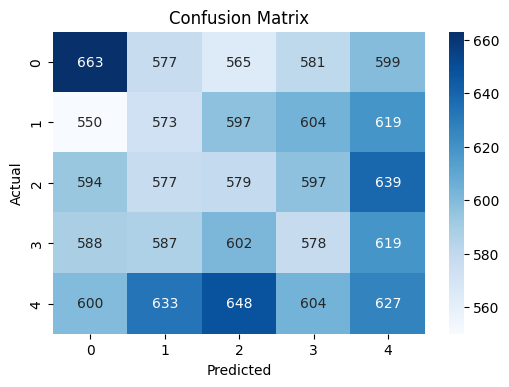

In [ ]:
plt.figure(dpi=100)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(test_images.labels,y_predicted_labels, normalize='true')

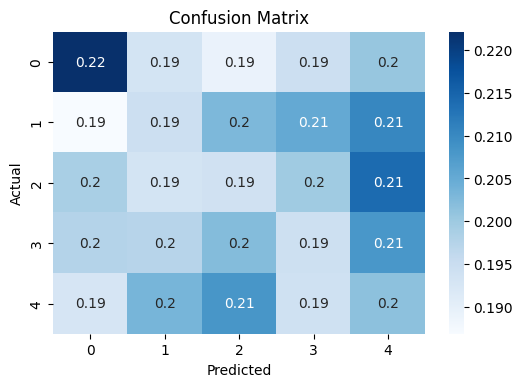

In [ ]:
plt.figure(dpi=100)
sns.heatmap(cm1, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()